# Chapter 04 Exercises Answer Key

# Total time: 7 hours

In [210]:
# Write the code for the libraries you use to complete the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1) Learning How to Solve Systems of Equations in Python

In economics, we often want to know the solution to equilibrium values. Take for example the table below from pg. 76 in the book.

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Production function     | $Y \text{ = } \bar{A}K^{1/3}L^{2/3}$ | 
| Rule for hiring capital | $\frac{1}{3}\cdot \frac{Y}{K} \text{=} r \space$ |
| Rule for hiring labor   | $\frac{2}{3}\cdot \frac{Y}{L} \text{=} \omega$ |
| Demand $=$ Supply for capital | $K = \bar{K}$ |
| Demand $=$ supply for labor | $L = \bar{L}$ |

In this case there are 5 equations and 5 unknowns. From the reading you learned the equilibrium in this simple economy is the solution to these equations.

In Python, it is possible to solve a system of two or more equations. As preparation for exercises in this assignment and future assignments you will learn how to solve a system of equations in Python. Follow the steps below to complete this exercise. 

**Review of Linear Algebra** 

In Econ 215 you learned the following formula can be used to find unknowns of a system of equations.
$$
Ax = b \ \ \ \ \ \ (1)
$$

The equation (1) can be manipulated and solved using rules from linear algebra to arrive at the following equation.
$$
x = A^{-1} b \ \ \ \ \ (2)
$$

Equation (2) says that the unknowns to a system of equations can be solved for by taking the inverse of matrix A and multiplying it by the constants of an equation. 


 **Video**

With those formulas in mind, watch the following video as it will teach you how to solve systems of equations in Python. 
    
__[Click here to watch video]( https://youtu.be/44pAWI7v5Zk)__

  

**Solve the Equations**

Using the information from the video solve the 1. and 2. below using Python.


__(a)__

\begin{align*}
3x - y &= 7 \\
2x + 3y &= 1 
\end{align*}

In [16]:
A = np.array([[3, -1], [2, 3]])
b = np.array([7, 1])

z = np.linalg.solve(A, b)
print(z)

[ 2. -1.]


__(b)__

\begin{align*}
x - 2y + 3z &= 7\\
2x + y + z &= 4\\
-3x + 2y - 2z &= -10
\end{align*}


In [17]:
A = np.array([[1, -2, 3], [2, 1, 1], [-3, 2, -2]])
b = np.array([7, 4, -10])

z = np.linalg.solve(A, b)
print(z)

[ 2. -1.  1.]



# The Black Death (Q2 and Q3)

In the middle of the fourteenth century, and epidemic known as the Black Death killed about a third of Europe's population, about 34 million people. While this was an enormous tragedy, the macroeconomic consequences might surprise you: over the next century, wages are estimated to have been *higher* than before the Black Death. Questions 2 and 3 will help you gain an understanding as to why this happened.



## Q2) Solving the production model

Before answering any questions about the Black Death, let's first build an understanding of the production function. Suppose the production function is given by $ Y = \bar{A}K^{\alpha}L^{1-\alpha}$. This is a general version of the production function we've been working with, where $\alpha$ is the "capital share of output." 

**(a)** Using pencil and paper (you don't have to enter the answer here), create a new version of Table 4.1 (pg. 76) for the model using this more general production function. What are the five equations and five unknowns? (*Hint*: The hiring rules for capital and labor will change in the obvious way.)

### Answer:

The final answer is shown in the table below. The derivation and explinations are as follows. 

* For the production function, the function is the same with the exception of the exponents for capital and labor. We make them more general as shown in the table. 

* MPK
$$
\frac{\partial Y}{\partial K} = \alpha \ \bar{A} K^{\alpha - 1} L ^{1 - \alpha} = \alpha \frac{\bar{A}K^\alpha L^{\alpha - 1}}{K} = \alpha \frac{Y}{K}
$$

* MPL
$$
\frac{\partial Y}{\partial L} = (1 - \alpha) \bar{A}K^{\alpha}L^{1 - \alpha - 1} = (1 - \alpha) \bar{A}K^{\alpha}L^{1 - \alpha}L^{-1} = (1 - \alpha)\frac{Y}{L}
$$




| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Production function     | $Y \text{ = } \bar{A}K^{\alpha}L^{1 - \alpha}$ | 
| Rule for hiring capital | $\alpha\cdot \frac{Y}{K} \text{=} r \space$ |
| Rule for hiring labor   | $1 - \alpha \frac{Y}{L} \text{=} \omega$ |
| Demand $=$ Supply for capital | $K = \bar{K}$ |
| Demand $=$ supply for labor | $L = \bar{L}$ |

**(b)** What is the solution for the equilibrium level of output per person? Let $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$. (*If Possible, attempt to use Python as a calculator to help compute the answer. You should verify your findings by hand. Should you use Python, you may want to declare functions. If you are not sure how to make a function do a google search on how to declare a function in Python*)

In [22]:
# Defining variables to then be used in calculations
A = 1
L = 200
K = 200
alpha = 1/3

################################################################

# Defining a function that returns the value of the production function
def cobb_doug(A, K, L, alpha):
    Y = A * pow(K, alpha) * pow(L, 1 - alpha)
    return Y

# Call the function Y, the produciton function
Y = cobb_doug(A, L, K, alpha)
print('Output:', Y)

################################################################
# Define a function for the MPK
def mpk(alpha, Y, K):
    r = alpha * (Y / K)
    return r

# Call the funcion mpk to get the MPK
r = mpk(alpha, Y, K)
print('MPK:', r)

################################################################
# Define a function for the MPL
def mpl(alpha, Y, K):
    r = (1 - alpha) * (Y / L)
    return r

# Call the funcion mpl to get the MPL
w = mpl(alpha, Y, L)
print('MPL:', w)

supply_for_capital = K
supply_for_labor = L
print('Supply for Capital:', K)
print('Supply for Labor:', L)



Output: 200.00000000000003
MPK: 0.33333333333333337
MPL: 0.6666666666666669
Supply for Capital: 200
Supply for Labor: 200


**(d)** How does changing the level of alpha ($\bar{A}$) affect the equilibrium level of output, rental rate of capital, and wages? Try $\bar{A}$={0.5, 0.75, 1.25, 1.5}

In [30]:
# Defining variables to then be used in calculations
A = np.array([0.5, 0.75, 1.25, 1.5])
L = 200
K = 200
alpha = 1/3

for i in range(0, 4):
    print("When A = ", A[i])
    Y = cobb_doug(A[i], L, K, alpha)
    print('Output:', Y)

    r = mpk(alpha, Y, K)
    print('MPK:', r)

    w = mpl(alpha, Y, L)
    print('MPL:', w, '\n')

When A =  0.5
Output: 100.00000000000001
MPK: 0.16666666666666669
MPL: 0.3333333333333334 

When A =  0.75
Output: 150.00000000000003
MPK: 0.25
MPL: 0.5000000000000001 

When A =  1.25
Output: 250.00000000000006
MPK: 0.41666666666666674
MPL: 0.8333333333333336 

When A =  1.5
Output: 300.00000000000006
MPK: 0.5
MPL: 1.0000000000000002 



 Output is positivly correlated with $A$.

## Q3) 

  **(a)** Show numerically how much wages would rise if a third of the population died from disease. Assume $\bar{A} = 1$, $L = 200$, $K = 200$, $\alpha = 1/3$, $Y = \bar{A}K^{1/3}L^{2/3}$ before the black plague.

In [239]:
A = 1
L = 200
K = 200
alpha = 1/3

Y = cobb_doug(A, K, L, alpha)
mpl_before = mpl(alpha, Y, L)
print('The inital wage would be: ', mpl_before)

L = 2/3 * L
Y = cobb_doug(A, K, L, alpha)
mpl_after = mpl(alpha, Y, L)
print('The wage after the black plauge would be: ', mpl_after)
print('The difference is: ', mpl_after - mpl_before)


The inital wage would be:  0.6666666666666669
The wage after the black plauge would be:  0.7631428283688881
The difference is:  0.09647616170222129


**(b)** Suppose that instead of the black plague there was an alien invasion of Europe that didn't kill anyone, but instead brought in new technology. How much would TFP have to increase to raise wages as much as the black plague? 

In [73]:
A = 1.1447
L = 200
K = 200
alpha = 1/3

Y = cobb_doug(A, K, L, alpha)
wage = mpl(alpha, Y, L)
print('Close enough: ', round(wage, 4))

Close enough:  0.7631


__Thus for a TFP of 1.447, the wage will be 0.7631__

# Q5) The empirical fit of the production model

The table on page 99 of the book (or shown below in the Pandas data frame) reports per capita GDP and capital per person in the year 2014 for 10 countries. __Your task is to fill in the missing columns of the data frame by completing steps a) thorugh d).__

In [240]:
# Run this code to create the data frame!
countries = ['United States', 'Canada', 'France', 'Hong Kong', 'South Korea', 'Indonesia', 'Argentina', 'Mexico', 'Kenya', 'Ethiopia']
capital_per_person1 = [141841, 128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227]
per_capita_GDP2 = [51895, 43367, 37360, 45095, 34961, 9797, 20074, 15521, 2971, 1505]
capital_per_person3 = [1.0, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
per_capita_GDP4 = [1.0, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
predicted_y = [1.0, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']
implied_TFP = [1.0, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']

df = pd.DataFrame({'Country(0)':countries, 
                   'Capital per person(1)':capital_per_person1, 
                  'Per capita GDP(2)':per_capita_GDP2, 
                  'Capital per person(3)':capital_per_person3, 
                  'Per capita GDP(4)':per_capita_GDP4, 
                  'Predicted y*(5)':predicted_y, 
                  'Implied TFP(6)':implied_TFP}, columns=['Country(0)', 'Capital per person(1)', 'Per capita GDP(2)', 'Capital per person(3)', 'Per capita GDP(4)', 'Predicted y*(5)', 'Implied TFP(6)'])
df


,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1,1,1,1
1,Canada,128667,43367,NaN,NaN,NaN,NaN
2,France,162207,37360,NaN,NaN,NaN,NaN
3,Hong Kong,159247,45095,NaN,NaN,NaN,NaN
4,South Korea,120472,34961,NaN,NaN,NaN,NaN
5,Indonesia,41044,9797,NaN,NaN,NaN,NaN
6,Argentina,53821,20074,NaN,NaN,NaN,NaN
7,Mexico,45039,15521,NaN,NaN,NaN,NaN
8,Kenya,4686,2971,NaN,NaN,NaN,NaN
9,Ethiopia,3227,1505,NaN,NaN,NaN,NaN


**(a)** Given the values in columns 1 and 2 which are in U.S. dollars, fill in columns 3 and 4 which are relative to U.S. values (U.S. = 1). That is, compute per capita GDP and capital per person relative to the U.S. values taking the ratio of each country's value (either Per capita GDP or Capital per Person) to the corresponding US value. 

In [241]:
# a)

###################################################################################################
# Calculating Column 3
###################################################################################################
USA_capital_pp = 141841
capital_per_person = np.array([128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227])

# Create an arra to loop through that will be used to store the calculations for capital per person
capital_per_person2 = [1]
zeros = np.zeros(9)
capital_per_person2 = np.append(capital_per_person2, zeros)

# Make a loop that uses columns 1 and 2 to calculate capital per person
for i in range(0, 9):    
    capital_per_person2[i+1] = capital_per_person[i] / USA_capital_pp


# Change column 2 to the new values and view the data frame
df['Capital per person(3)'] = capital_per_person2

###################################################################################################
# Calculating Column 4
###################################################################################################

# For per capita GDP we have
USA_GDP = 51895
per_capita_GDP = np.array([43367, 37360, 45095, 34961, 9797, 20074, 15521, 2971, 1505])


new_GDP = [1]
new_GDP = np.append(new_GDP, zeros)


for i in range(0, 9):    
    new_GDP[i+1] = per_capita_GDP[i] / USA_GDP

df['Per capita GDP(4)'] = new_GDP
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1,1
1,Canada,128667,43367,0.907121,0.835668,NaN,NaN
2,France,162207,37360,1.143583,0.719915,NaN,NaN
3,Hong Kong,159247,45095,1.122715,0.868966,NaN,NaN
4,South Korea,120472,34961,0.849345,0.673687,NaN,NaN
5,Indonesia,41044,9797,0.289366,0.188785,NaN,NaN
6,Argentina,53821,20074,0.379446,0.386820,NaN,NaN
7,Mexico,45039,15521,0.317532,0.299085,NaN,NaN
8,Kenya,4686,2971,0.033037,0.057250,NaN,NaN
9,Ethiopia,3227,1505,0.022751,0.029001,NaN,NaN


**(b)** In column 5, use the production model (with $\alpha=1/3$) to compute predicted per capita GDP for each country relative to the United States. Assume $\bar{A}=1$, which implies there are no TFP differences across countries. This implies the production function is $y^\ast = \bar{A}K^{1/3}$.

In [242]:
# b)
# Delcare the variables A and K where K is an array of 
A = 1
capital_per_person = np.array([141841, 128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227])
K = capital_per_person

# define a function called prod_func
def prod_func(A, K):
    USA_capital = K[0]
    column_5 = (A * pow(K, 1/3)) / (A * pow(K[0], 1/3))
    return column_5


y = prod_func(A, K)

df['Predicted y*(5)'] = y
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1
1,Canada,128667,43367,0.907121,0.835668,0.968029,NaN
2,France,162207,37360,1.143583,0.719915,1.045737,NaN
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,NaN
4,South Korea,120472,34961,0.849345,0.673687,0.947025,NaN
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,NaN
6,Argentina,53821,20074,0.379446,0.386820,0.723963,NaN
7,Mexico,45039,15521,0.317532,0.299085,0.682227,NaN
8,Kenya,4686,2971,0.033037,0.057250,0.320873,NaN
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,NaN


**(c)** In column 6, compute the level of TFP for each country that is needed  to the model to the data. This can be done with the following formula. 

$$
TFP = \frac{ y^\ast \text{ U.S.}}{\frac{k^{1/3} \text{for a given country}}{k^{1/3} \text{ for U.S.}}}
$$

In [243]:
# c) 

capital_per_person1 = np.array([141841, 128667, 162207, 159247, 120472, 41044, 53821, 45039, 4686, 3227])

A = 1 / ((capital_per_person1**(1/3)) / (capital_per_person[0]**(1/3)))


df['Implied TFP(6)'] = A
df

,Country(0),Capital per person(1),Per capita GDP(2),Capital per person(3),Per capita GDP(4),Predicted y*(5),Implied TFP(6)
0,United States,141841,51895,1.000000,1.000000,1.000000,1.000000
1,Canada,128667,43367,0.907121,0.835668,0.968029,1.033027
2,France,162207,37360,1.143583,0.719915,1.045737,0.956263
3,Hong Kong,159247,45095,1.122715,0.868966,1.039337,0.962152
4,South Korea,120472,34961,0.849345,0.673687,0.947025,1.055938
5,Indonesia,41044,9797,0.289366,0.188785,0.661428,1.511880
6,Argentina,53821,20074,0.379446,0.386820,0.723963,1.381285
7,Mexico,45039,15521,0.317532,0.299085,0.682227,1.465788
8,Kenya,4686,2971,0.033037,0.057250,0.320873,3.116495
9,Ethiopia,3227,1505,0.022751,0.029001,0.283356,3.529130


**(d)** Comment on the general results you find.

Answers may vary

## Q6) The labor share and Cobb-Douglas production (a FRED question)

Download the FRED `ch04_labor_compensation.csv` file (see 6(a) code comments) for the share of income paid to labor for the nonfarm business sector of the U.S. economy, back to 1950. (For an introduction to FRED, see the case study "The FRED database" in Chapter 2 on page 34).

**(a)** Create a time series plot of the data you downloaded.

          DATE  LABSHPUSA156NRUG
0   1950-01-01          0.635634
1   1951-01-01          0.640813
2   1952-01-01          0.651878
3   1953-01-01          0.651648
4   1954-01-01          0.644531
5   1955-01-01          0.633919
6   1956-01-01          0.648066
7   1957-01-01          0.646437
8   1958-01-01          0.645884
9   1959-01-01          0.638004
10  1960-01-01          0.646128
11  1961-01-01          0.643108
12  1962-01-01          0.638176
13  1963-01-01          0.635656
14  1964-01-01          0.633658
15  1965-01-01          0.628558
16  1966-01-01          0.631823
17  1967-01-01          0.639095
18  1968-01-01          0.643643
19  1969-01-01          0.653653
20  1970-01-01          0.659110
21  1971-01-01          0.647887
22  1972-01-01          0.649779
23  1973-01-01          0.650986
24  1974-01-01          0.650661
25  1975-01-01          0.634779
26  1976-01-01          0.630503
27  1977-01-01          0.630257
28  1978-01-01          0.630425
29  1979-0

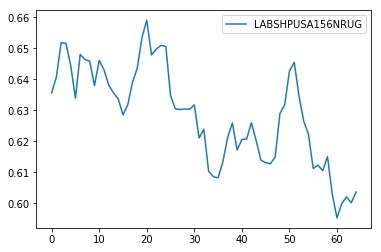

In [246]:
# Use what you learned in the Intermediate Python for Data Science Course in Data Camp (or consider looking at code 
# given in past assignments) to import the data using the Pandas library. Note when importing the .csv file, you need to 
# be able to tell the computer where to the data are located so it can read them in. The data are located in the link. 
# Instead of putting a file path to your computer for your read csv function, you will simply substitute the link below into 
# the import python function and proceed like a regular data import your learned in Data Camp. For the plotting consider using the pandas
# function df.plot where df is the name of your data frame.
# Link: https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch04_labor_compensation.csv


# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/dylanjm/econ_381_development/master/data/ch04_labor_compensation.csv")
print(df)

# It is easier to use Pandas to plot in this case instead of matplotlib
df.plot()

**(b)** The graph most likely shows an index (e.g., normalized so the value in some year is 100) rather than the share itself. Assuming the labor averaged $2/3$, approximately what value is the labor share for your most recent data point? **Python hint:** you will need to access the last data point in the second column. If my data frame was named df, then I could access the first item in the second coumn by using the code df[0, 1]. The numbers correspond to the row first, and then the column number.

In [253]:
# Last row, second column
df.iat[63, 1]

0.6001111865

**(c)** What does this graph suggest about the validity of our assumptions that the production function is Cobb-Douglas?